In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from keras.layers import Dropout
from tensorflow import keras
import pydotplus
from keras.utils.vis_utils import plot_model

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.random import set_seed 

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.python.keras.callbacks import ModelCheckpoint
from tensorflow.python.keras import layers, models, Model, optimizers

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Text(0.5, 1.0, 'Eğitim bölümündeki 10 rakama ait fotoğraf sayısı:')

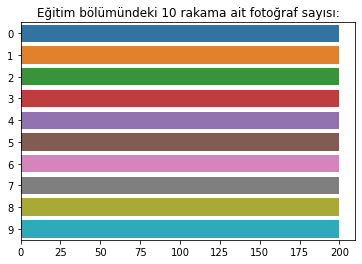

In [199]:
# Eğitim ve test verilerinin 
train_data_dir = r"C:\Users\ASUS\Desktop\Yapay Zeka Ödev\mnist-train"
test_data_dir = r"C:\Users\ASUS\Desktop\Yapay Zeka Ödev\mnist-test"
category_names = sorted(os.listdir(r"C:\Users\ASUS\Desktop\Yapay Zeka Ödev\mnist-train"))
nb_categories = len(category_names)
img_pr_number = []
img_pr_number_test = []
for category in category_names:
    folder = r"C:\Users\ASUS\Desktop\Yapay Zeka Ödev\mnist-train" + '/' + category
    img_pr_number.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_number).set_title("Eğitim bölümündeki 10 rakama ait fotoğraf sayısı:")

Text(0.5, 1.0, 'Test bölümündeki 10 rakama ait fotoğraf sayısı:')

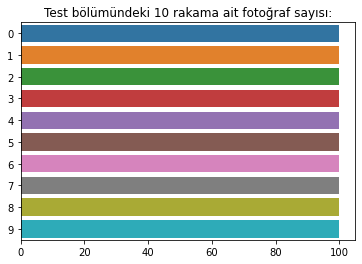

In [200]:
for category in category_names:
    folder2 = r"C:\Users\ASUS\Desktop\Yapay Zeka Ödev\mnist-test" + '/' + category
    img_pr_number_test.append(len(os.listdir(folder2)))
sns.barplot(y=category_names, x=img_pr_number_test).set_title("Test bölümündeki 10 rakama ait fotoğraf sayısı:")

In [201]:
#Eğitim ve test verilerinin yüklenmesi.

#bs=20 #Batch size - Yani 20'li gruplar halinde veriler alınacak.

#Bütün fotoğraflar 1/255 oranında yeniden ölçeklendirilecek. 
train_datagen = ImageDataGenerator( rescale = 1.0/255. ,validation_split=0.3)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# Flow_from_directory; sınıflandırıcının, görüntünün bulunduğu dizinlerin adından etiketleri doğrudan tanımlamasını sağlar.
train_generator=train_datagen.flow_from_directory(train_data_dir,subset='training',class_mode='categorical',batch_size=20,target_size=(128,128))

validation_generator =  train_datagen.flow_from_directory(train_data_dir, batch_size=20,
                                                         class_mode  = 'categorical',subset='validation',
                                                         target_size=(128,128))

test_generator=train_datagen.flow_from_directory(test_data_dir,class_mode='categorical',batch_size=20,target_size=(128,128))

Found 1400 images belonging to 10 classes.
Found 600 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [202]:
train_generator.samples

1400

In [203]:
len(train_generator) # İçerisinde 70 adet 20'lik yığınlar var. Batch_size 20 olduğu için.

70

In [204]:
train_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [205]:
validation_generator.samples

600

In [206]:
len(validation_generator) #İçerisinde 30 adet 20'lik yığınlar var.Batch_size 20 olduğu için.

30

In [207]:
validation_generator.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [208]:
# Eğitim verileri ve kategorileri, test verileri ve kategorileri şeklinde bölümleme yapılıyor.

X_train, y_train = train_generator.next()
print('Train shape=%s, min=%.3f, max=%.3f' % (X_train.shape, X_train.min(), X_train.max()))



X_test, y_test = test_generator.next()
print('Test shape=%s, min=%.3f, max=%.3f' % (X_test.shape, X_test.min(), X_test.max()))


# Her seferinde 20 tane (128 x 128) boyutlu görüntüyü geri döndürecektir çünkü batch_size = 20 olarak ayarlandı.

Train shape=(20, 128, 128, 3), min=0.000, max=1.000
Test shape=(20, 128, 128, 3), min=0.000, max=1.000


In [209]:
model = Sequential([
    
    #İlk katman. Bu katman ile girdi görüntüsü bir boyutlu diziye dönüşür.
    Flatten(input_shape=(128, 128,3)),
    
    # dense layer 1  - Gizli katman-1
    Dense(30, activation='relu'),  
    
    # dense layer 2  - Gizli katman-2
    Dense(20, activation='relu'), 
    
    # dense layer 3  - Gizli katman-3
    Dense(30, activation='relu'), 
    
    # output layer - Çıktı katmanı
    Dense(10, activation='sigmoid'),  
    #10 farklı rakam olduğu için output katmanında 10 düğüm olacak.
])

In [210]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 49152)             0         
                                                                 
 dense_25 (Dense)            (None, 30)                1474590   
                                                                 
 dense_26 (Dense)            (None, 20)                620       
                                                                 
 dense_27 (Dense)            (None, 30)                630       
                                                                 
 dense_28 (Dense)            (None, 10)                310       
                                                                 
Total params: 1,476,150
Trainable params: 1,476,150
Non-trainable params: 0
_________________________________________________________________


In [211]:
model.compile(loss="categorical_crossentropy", optimizer=tf.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy'])

In [212]:
history2 = model.fit(train_generator,validation_data=validation_generator, epochs=10)

Epoch 1/10
70/70 [==============================] - 2s 25ms/step - loss: 1.4228 - accuracy: 0.5350 - val_loss: 0.9727 - val_accuracy: 0.7100
Epoch 2/10
70/70 [==============================] - 2s 21ms/step - loss: 0.6801 - accuracy: 0.8086 - val_loss: 0.7181 - val_accuracy: 0.7633
Epoch 3/10
70/70 [==============================] - 2s 22ms/step - loss: 0.4469 - accuracy: 0.8857 - val_loss: 0.7167 - val_accuracy: 0.8100
Epoch 4/10
70/70 [==============================] - 2s 22ms/step - loss: 0.3237 - accuracy: 0.9100 - val_loss: 0.8033 - val_accuracy: 0.7867
Epoch 5/10
70/70 [==============================] - 2s 22ms/step - loss: 0.2281 - accuracy: 0.9336 - val_loss: 0.6112 - val_accuracy: 0.8417
Epoch 6/10
70/70 [==============================] - 2s 28ms/step - loss: 0.1622 - accuracy: 0.9529 - val_loss: 0.7601 - val_accuracy: 0.8133
Epoch 7/10
70/70 [==============================] - 2s 28ms/step - loss: 0.1305 - accuracy: 0.9643 - val_loss: 0.6441 - val_accuracy: 0.8367
Epoch 8/10
70

In [213]:
# Eğitim sonrası test
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

1/1 [==============================] - 0s 84ms/step - loss: 0.3006 - accuracy: 0.9000
Test results - Loss: 0.3006032109260559 - Accuracy: 0.8999999761581421%


In [184]:
import pandas as pd

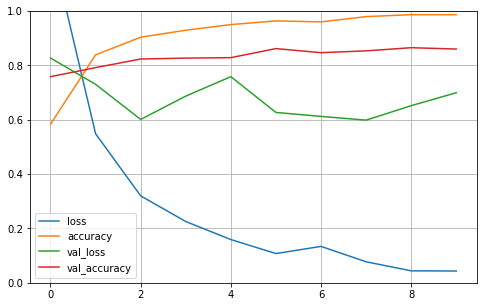

In [185]:
pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [186]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [187]:
y_pred=model.predict(X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[3 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 1 0 3]]


In [188]:
#Test İçin 
test_report = classification_report(y_test,y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.97      0.96        20
weighted avg       0.97      0.95      0.95        20



In [189]:
f = open("test_report.txt", "w")
f.write(test_report)
f.close()

In [190]:
x_pred=model.predict(X_train) 
x_pred=np.argmax(x_pred, axis=1)
y_train=np.argmax(y_train, axis=1)
cm2 = confusion_matrix(y_train, x_pred)
print(cm2)

[[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 3]]


In [191]:
#Eğitim için
train_report = classification_report(y_train,y_pred)
print(train_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         3
           2       0.25      0.33      0.29         3
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.33      0.33      0.33         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         3

    accuracy                           0.10        20
   macro avg       0.06      0.07      0.06        20
weighted avg       0.09      0.10      0.09        20



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
f = open("train_report.txt", "w")
f.write(train_report)
f.close()

In [193]:
model.save('num.model')

INFO:tensorflow:Assets written to: num.model\assets


In [194]:
new_model = tf.keras.models.load_model('num.model')

In [195]:
predictions = new_model.predict([X_test])

In [196]:
print(predictions)

[[9.95011449e-01 8.00149064e-06 3.16493167e-03 1.80127064e-03
  9.56343091e-14 1.15271026e-09 2.27733832e-08 1.23119764e-10
  1.42369918e-05 5.60927909e-08]
 [3.47930030e-03 9.12824483e-09 9.92764890e-01 3.25325271e-03
  3.16063438e-06 1.71773843e-06 4.61624149e-04 1.18075945e-07
  7.32104991e-06 2.85327624e-05]
 [9.97517109e-01 1.41125201e-05 2.29783962e-03 4.76466630e-05
  3.47717477e-09 4.95390168e-07 1.07261531e-06 6.83446677e-09
  1.18065924e-04 3.57647559e-06]
 [2.14614382e-04 9.32087948e-11 9.97395039e-01 3.04213785e-07
  5.29385353e-08 1.02294591e-08 1.20533886e-03 2.66182028e-08
  1.18464150e-03 5.20641263e-09]
 [1.08780714e-12 5.02231963e-08 3.09892357e-07 1.22064321e-07
  1.01649237e-03 1.78680568e-06 6.16600437e-10 1.04687177e-03
  4.90300818e-06 9.97929454e-01]
 [3.83802080e-06 1.25109494e-14 2.46094856e-09 2.33260398e-08
  2.79360354e-01 7.20105827e-01 5.28644712e-04 1.15191461e-10
  1.16857609e-06 8.42020071e-08]
 [1.28591604e-09 6.85374257e-11 7.19693825e-02 3.07413757e

In [197]:
print(np.argmax(predictions[0]))

0


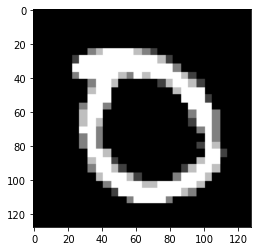

In [198]:
plt.imshow(X_test[0])
plt.show()